In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [321]:
train_df = pd.read_csv("E:\StoreSaleML\Data\Train.csv")
test_df = pd.read_csv("E:\StoreSaleML\Data\Test.csv")

In [322]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [323]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [324]:
train_df.shape , test_df.shape

((8523, 12), (5681, 11))

In [325]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [326]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_Weight and Outlet_Size Columns Contains a Null values

In [327]:
# to fill the null values  of item weight using mean of item type
train_df['Item_Weight'] = train_df.groupby('Item_Type')['Item_Weight'].transform( lambda x : x.fillna(x.median()))
test_df['Item_Weight'] = test_df.groupby('Item_Type')['Item_Weight'].transform( lambda x : x.fillna(x.median()))

In [328]:
mode_by_outlet_type = train_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode().iloc[0])
mapping = dict(zip(train_df['Outlet_Type'], mode_by_outlet_type))

# Replace the null values in Outlet_Size with the corresponding mode by Outlet_Type
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Type'].map(mapping))

mode_by_outlet_type = test_df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode().iloc[0])
mapping = dict(zip(test_df['Outlet_Type'], mode_by_outlet_type))

# Replace the null values in Outlet_Size with the corresponding mode by Outlet_Type
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Type'].map(mapping))


In [329]:
print(train_df.isnull().sum(),"--"*40)
print(test_df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 --------------------------------------------------------------------------------
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [330]:
train_df['Item_Visibility'].value_counts()   # it cannot be zero so replace with mean 
test_df['Item_Visibility'].value_counts()    # it cannot be zero so replace with mean 

Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [331]:
visi_mean=train_df['Item_Visibility'].mean()
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace({0.000000:visi_mean})
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace({0.000000:visi_mean})

In [332]:
train_df['Item_Visibility'].value_counts()   
test_df['Item_Visibility'].value_counts()  

Item_Visibility
0.066132    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

In [333]:
train_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [334]:
# replaceing the values
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [335]:
train_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [336]:
train_df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [337]:
train_df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5695,DRH23,14.650,Low Fat,0.170664,Hard Drinks,56.4614,OUT045,2002,Small,Tier 2,Supermarket Type1,1436.7964
1872,DRF36,16.100,Low Fat,0.023577,Soft Drinks,192.6846,OUT046,1997,Small,Tier 1,Supermarket Type1,2866.2690
6884,FDS11,7.050,Regular,0.055548,Breads,225.3088,OUT035,2004,Small,Tier 2,Supermarket Type1,5816.4288
7549,FDK56,9.695,Low Fat,0.066132,Fruits and Vegetables,186.7898,OUT010,1998,Small,Tier 3,Grocery Store,561.2694


In [338]:
train_df['Item_Identifier']=train_df['Item_Identifier'].apply(lambda x : x[0:2])
test_df['Item_Identifier']=test_df['Item_Identifier'].apply(lambda x : x[0:2])

In [339]:
train_df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5246,NC,17.10,Low Fat,0.067154,Household,114.3860,OUT046,1997,Small,Tier 1,Supermarket Type1,1245.0460
259,FD,9.10,Low Fat,0.175103,Baking Goods,127.5362,OUT017,2007,Small,Tier 2,Supermarket Type1,4655.9394
3754,FD,11.15,Regular,0.086106,Snack Foods,167.8790,OUT045,2002,Small,Tier 2,Supermarket Type1,2886.2430
7350,FD,12.85,Low Fat,0.108103,Fruits and Vegetables,233.3642,OUT013,1987,High,Tier 3,Supermarket Type1,3950.1914


In [340]:
# replace FD:Foods , DR : Drinks ,NC : Non_Consumer
map = {'FD':'Food','DR':'Drinks','NC':'Non_Consumer'}
train_df['Item_Identifier'] = train_df['Item_Identifier'].map(map)
test_df['Item_Identifier'] = test_df['Item_Identifier'].map(map)

In [341]:
train_df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2838,Food,12.85,Regular,0.090473,Frozen Foods,229.7984,OUT027,1985,Medium,Tier 3,Supermarket Type3,6024.1584
1047,Drinks,7.85,Low Fat,0.162980,Hard Drinks,145.2444,OUT046,1997,Small,Tier 1,Supermarket Type1,1451.4440
8110,Food,12.35,Regular,0.121174,Dairy,47.8692,OUT010,1998,Small,Tier 3,Grocery Store,49.2692
4874,Food,9.30,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Small,Tier 3,Grocery Store,498.0184


In [342]:
train_df['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [343]:
train_df['Working_Year'] = 2022 - train_df['Outlet_Establishment_Year']
test_df['Working_Year'] = 2022 - test_df['Outlet_Establishment_Year']

In [344]:
train_df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Working_Year
362,Food,14.350,Low Fat,0.080758,Baking Goods,81.8960,OUT045,2002,Small,Tier 2,Supermarket Type1,878.8560,20
498,Food,16.000,Regular,0.099252,Frozen Foods,87.4856,OUT035,2004,Small,Tier 2,Supermarket Type1,1054.6272,18
7251,Non_Consumer,14.600,Low Fat,0.059611,Others,238.3538,OUT045,2002,Small,Tier 2,Supermarket Type1,2163.1842,20
6216,Food,7.485,Low Fat,0.069405,Snack Foods,112.1228,OUT018,2009,Medium,Tier 3,Supermarket Type2,1105.2280,13


In [345]:
def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)

def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [346]:
# sepreating numerical and categorical columns
# Select categorical columns
cat_col = train_df.select_dtypes(include=['object']).columns

# Select numerical columns
num_col = train_df.select_dtypes(exclude=['object']).columns

In [347]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [348]:
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Working_Year'],
      dtype='object')

# Univariate Analysis

In [349]:
train_df['Item_Identifier'].value_counts()

Item_Identifier
Food            6125
Non_Consumer    1599
Drinks           799
Name: count, dtype: int64

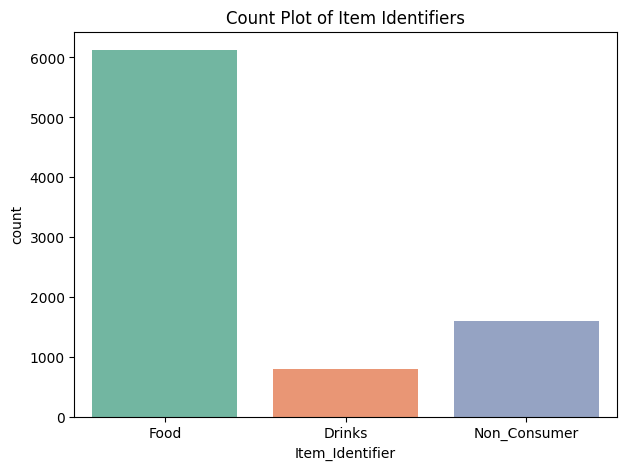

In [350]:
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Item_Identifier', palette='Set2')
plt.title("Count Plot of Item Identifiers")
plt.show()


foods items moslty present in the dataset ,drinks present less in count

In [351]:
train_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

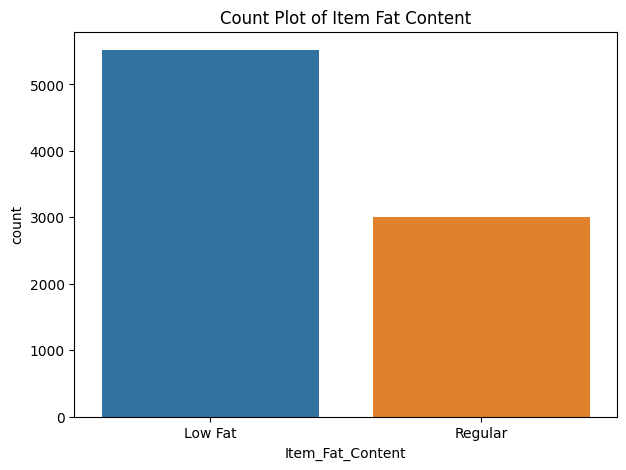

In [352]:
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Item_Fat_Content')
plt.title("Count Plot of Item Fat Content")
plt.show()

low fat item is moslty present in the dataset column name Item_fat_content than regular

In [353]:
train_df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

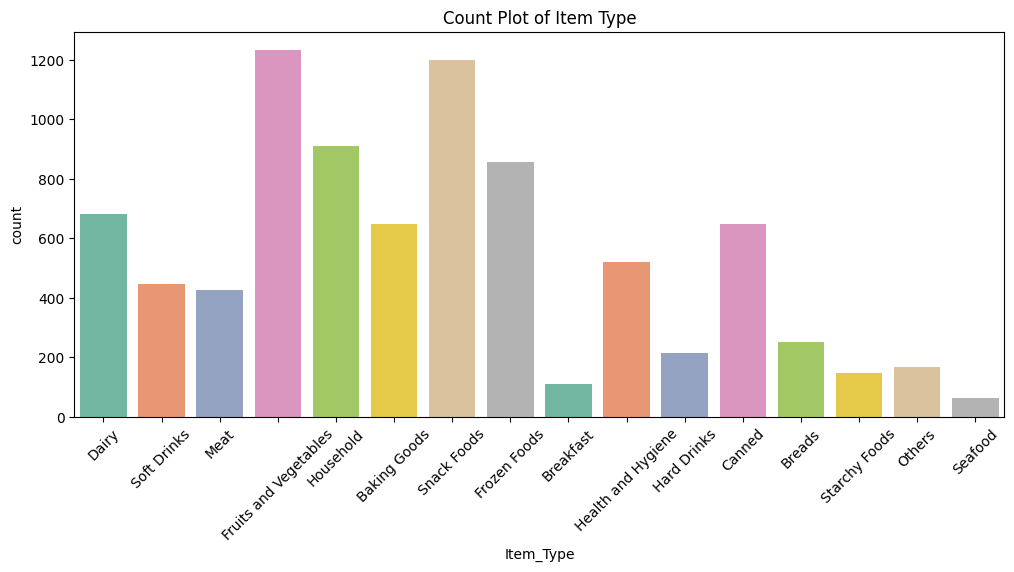

In [354]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_df,x='Item_Type',palette="Set2")
plt.title("Count Plot of Item Type")
plt.xticks(rotation=45)
plt.show()

Fruits & vegetable and snacks foods mostly present in the dataset

In [355]:
train_df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

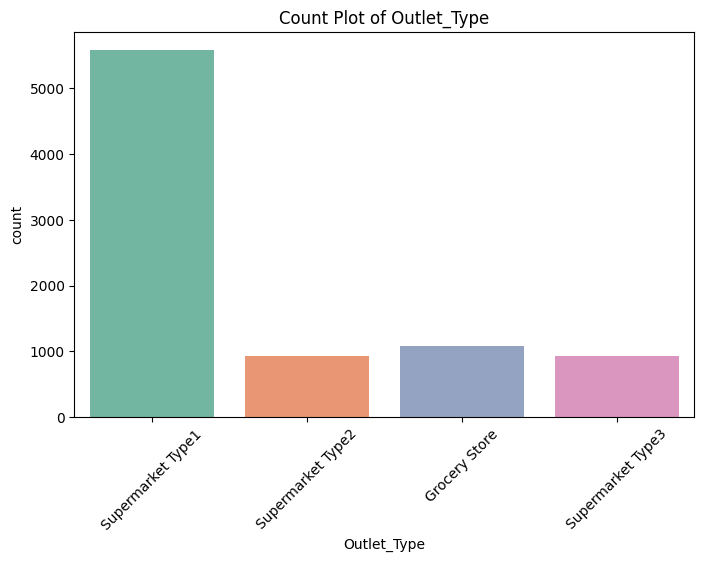

In [356]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='Outlet_Type',palette="Set2")
plt.title("Count Plot of Outlet_Type")
plt.xticks(rotation=45)
plt.show()

Supermarket Type 1 present in the datsets

In [357]:
train_df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

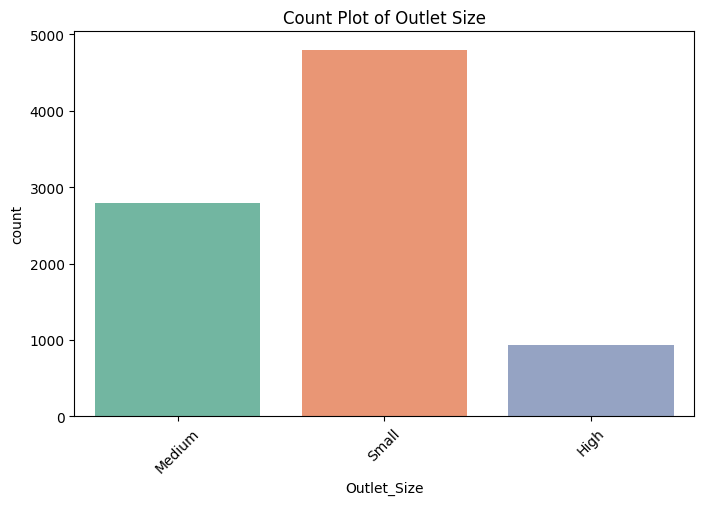

In [358]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x='Outlet_Size',palette="Set2")
plt.title("Count Plot of Outlet Size")
plt.xticks(rotation=45)
plt.show()

most of the outlet type is small then medium and small

In [359]:
train_df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

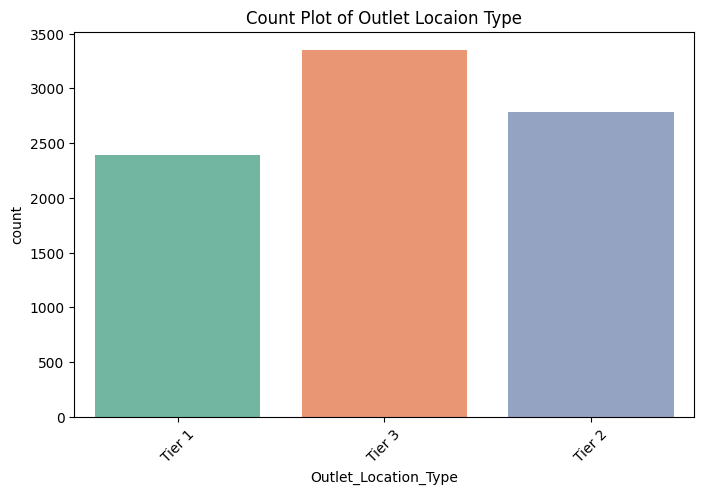

In [360]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x='Outlet_Location_Type',palette="Set2")
plt.title("Count Plot of Outlet Locaion Type")
plt.xticks(rotation=45)
plt.show()

outlet location types moslty is Tier3

In [361]:
train_df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

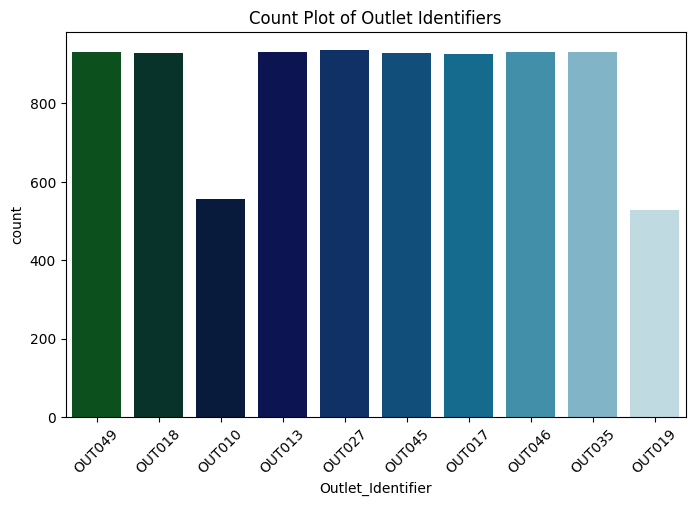

In [362]:
plt.figure(figsize=(8,5))
sns.countplot(data = train_df,x='Outlet_Identifier',palette="ocean")
plt.title("Count Plot of Outlet Identifiers")
plt.xticks(rotation=45)
plt.show()

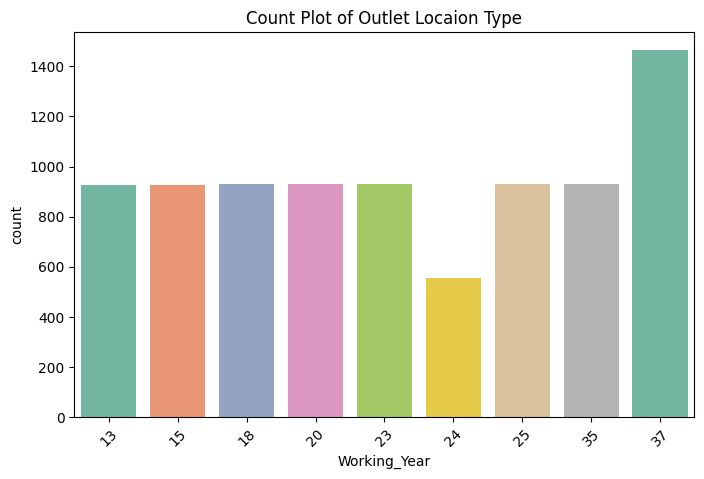

In [363]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df,x='Working_Year',palette="Set2")
plt.title("Count Plot of Outlet Locaion Type")
plt.xticks(rotation=45)
plt.show()

Outlet age is mos of 37 years old

## Numerical Columns 

In [364]:
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Working_Year'],
      dtype='object')

<Axes: >

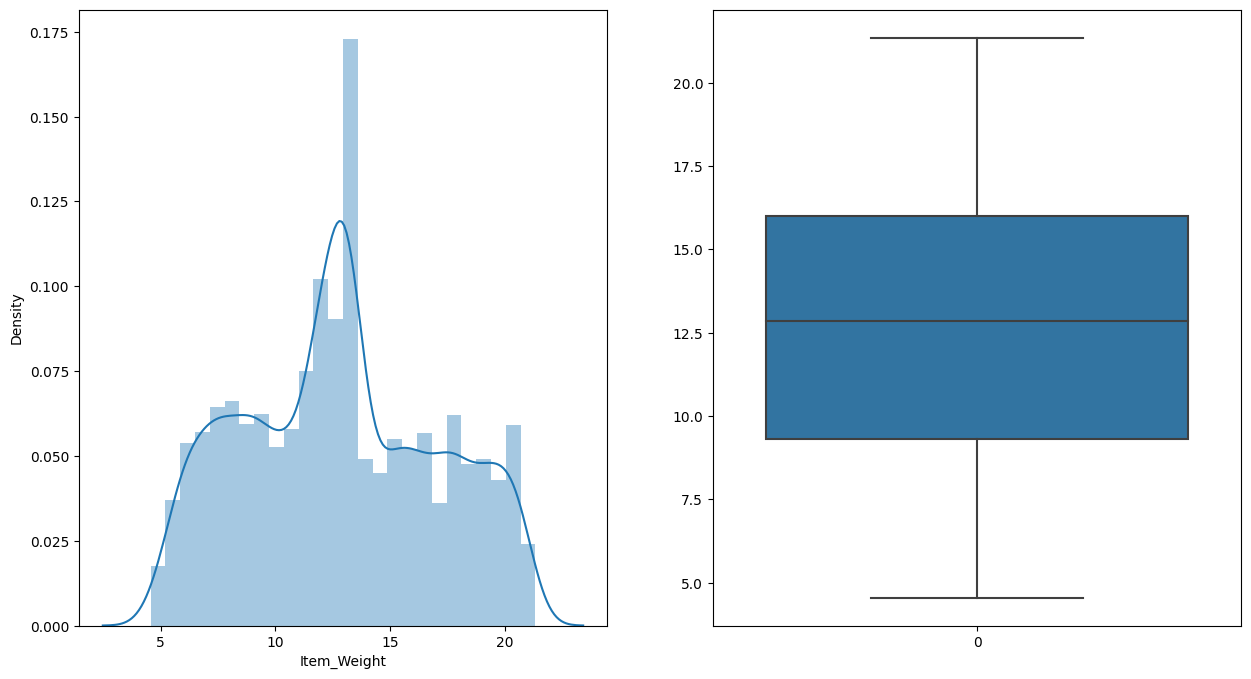

In [365]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_Weight'], ax=ax[0])
sns.boxplot(train_df['Item_Weight'], ax=ax[1])

<Axes: >

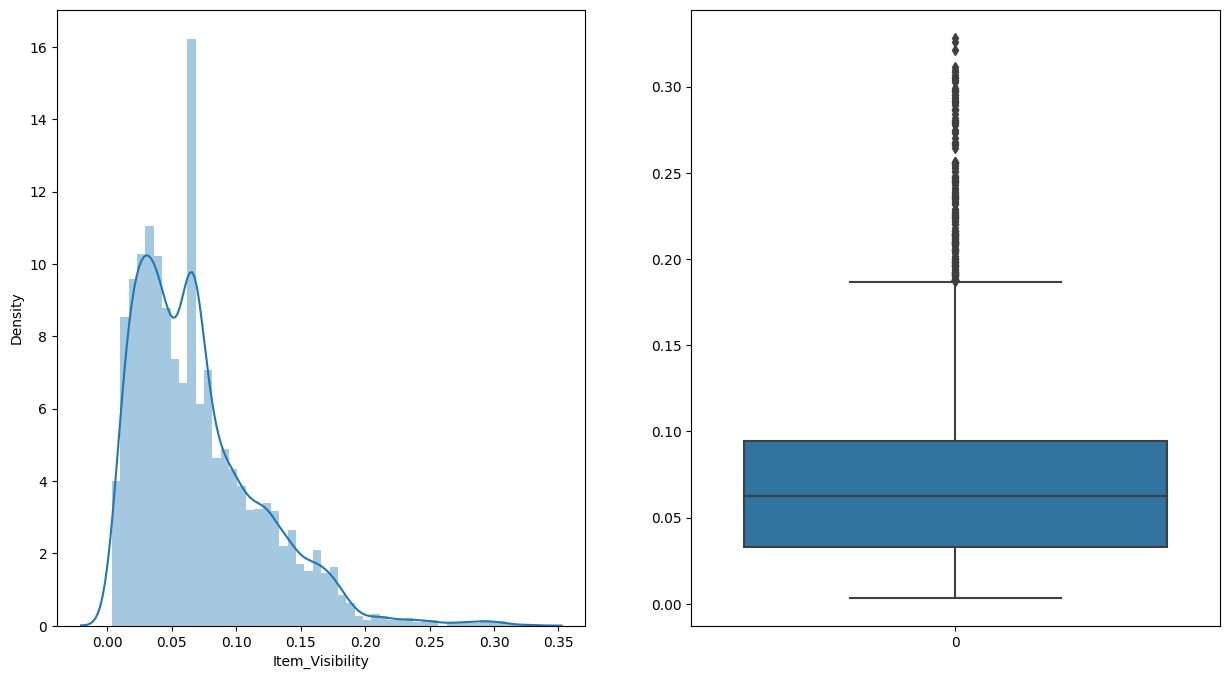

In [366]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_Visibility'], ax=ax[0])
sns.boxplot(train_df['Item_Visibility'], ax=ax[1])

In [367]:
train_df['Item_Visibility'] = train_df["Item_Visibility"].map(sqrt_transformation)
test_df['Item_Visibility'] = test_df["Item_Visibility"].map(sqrt_transformation)

<Axes: >

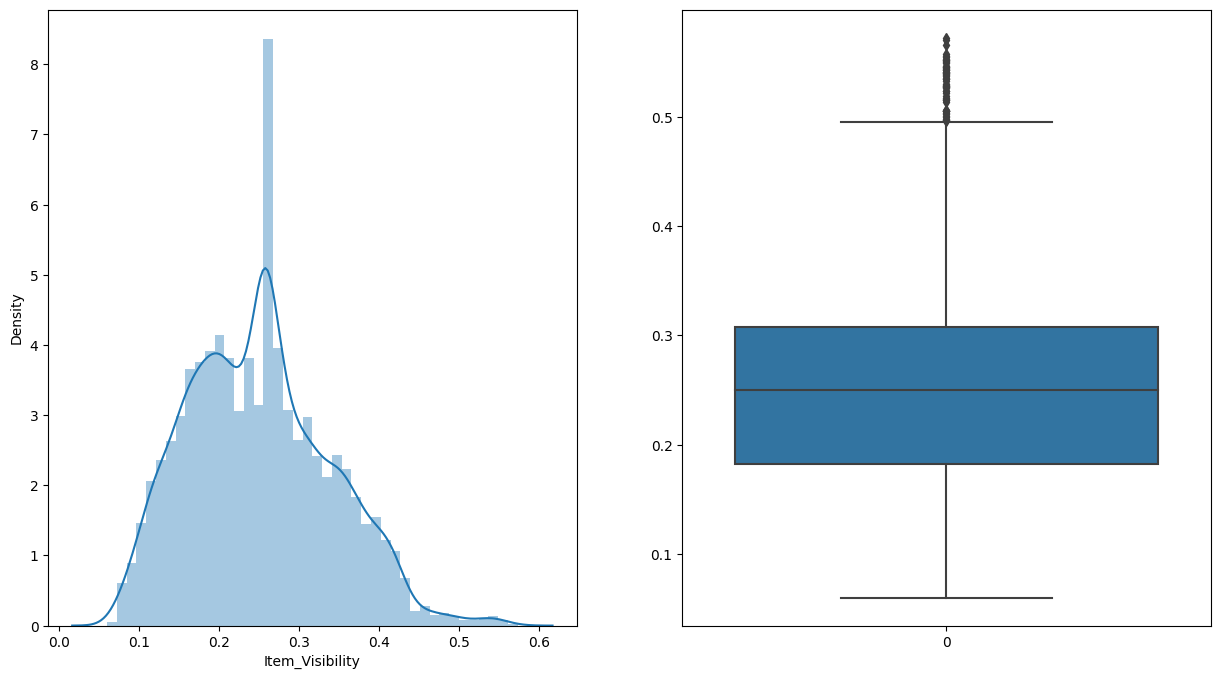

In [368]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_Visibility'], ax=ax[0])
sns.boxplot(train_df['Item_Visibility'], ax=ax[1])

In [369]:
train_df[train_df['Item_Visibility'] >0.5].shape

(55, 13)

<Axes: >

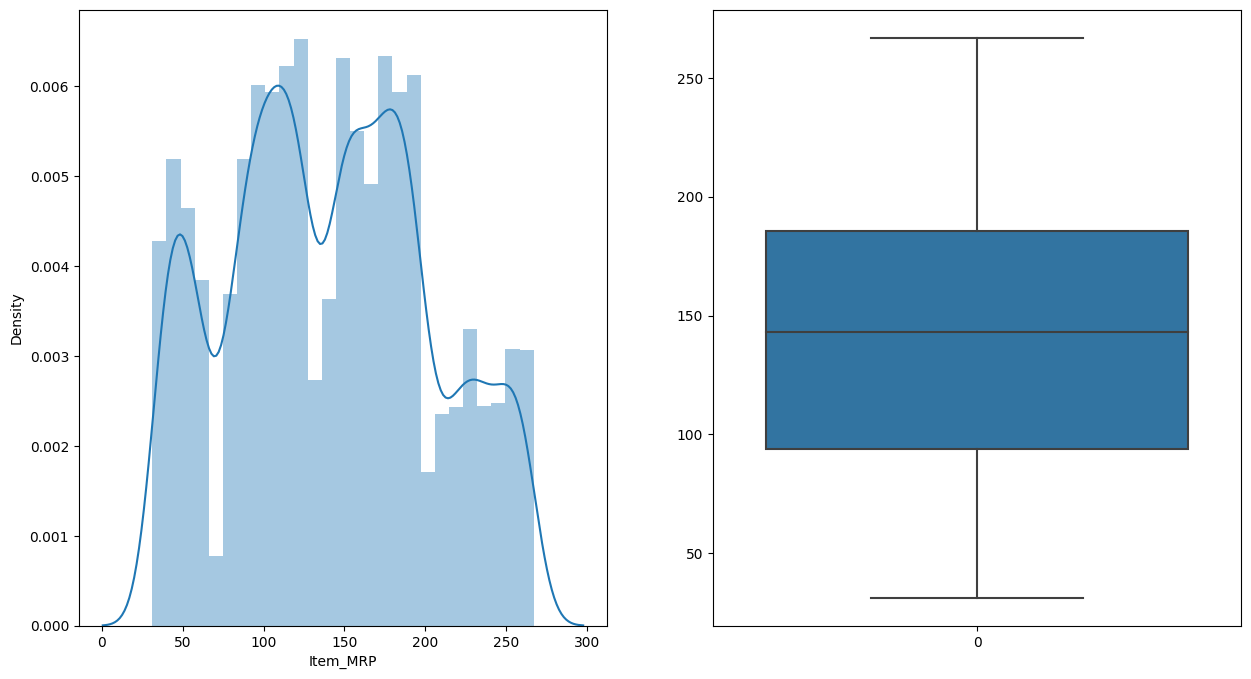

In [370]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_MRP'], ax=ax[0])
sns.boxplot(train_df['Item_MRP'], ax=ax[1])

<Axes: >

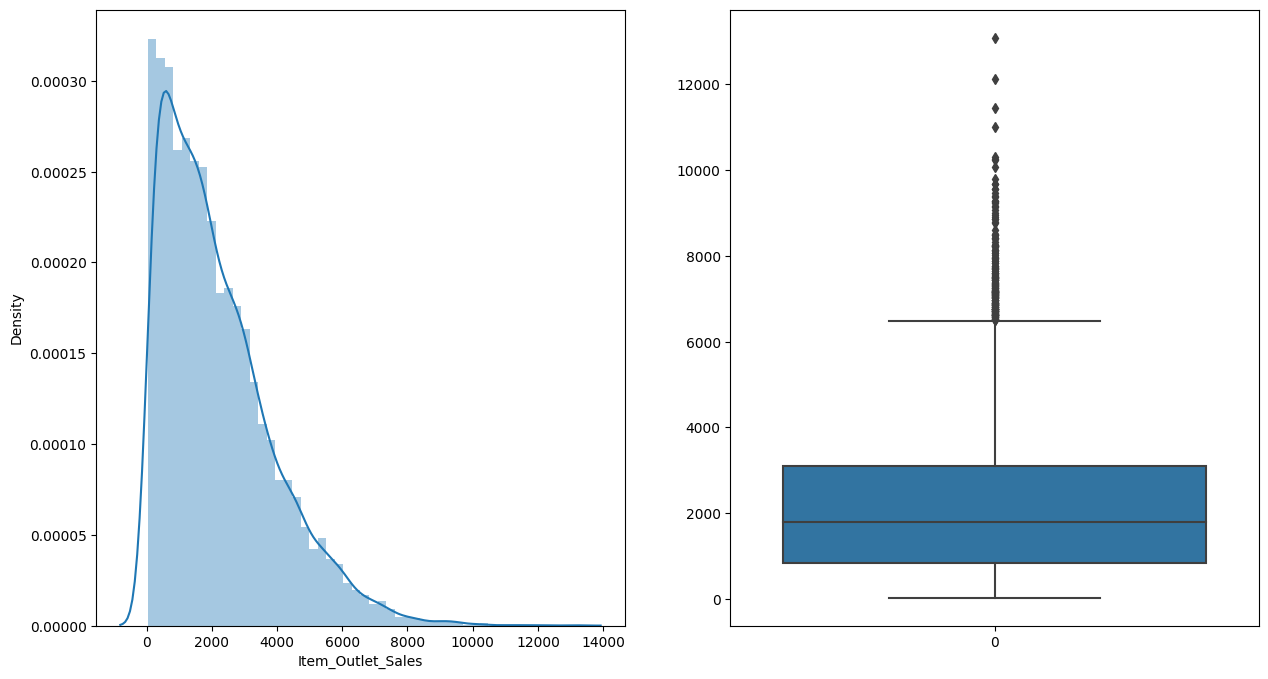

In [371]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_Outlet_Sales'], ax=ax[0])
sns.boxplot(train_df['Item_Outlet_Sales'], ax=ax[1])

In [372]:
train_df['Item_Outlet_Sales'] = train_df['Item_Outlet_Sales'].map(sqrt_transformation)


<Axes: >

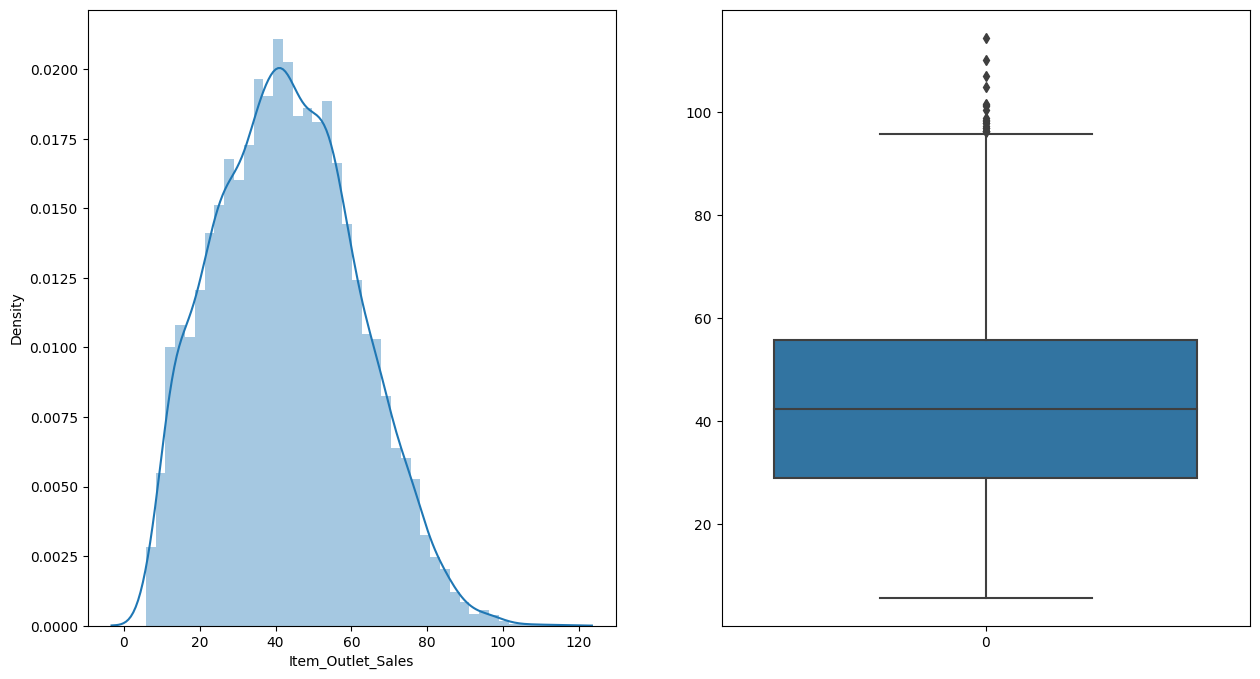

In [373]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.distplot(train_df['Item_Outlet_Sales'], ax=ax[0])
sns.boxplot(train_df['Item_Outlet_Sales'], ax=ax[1])

In [374]:
train_df[train_df['Item_Outlet_Sales'] > 100].count()

Item_Identifier              8
Item_Weight                  8
Item_Fat_Content             8
Item_Visibility              8
Item_Type                    8
Item_MRP                     8
Outlet_Identifier            8
Outlet_Establishment_Year    8
Outlet_Size                  8
Outlet_Location_Type         8
Outlet_Type                  8
Item_Outlet_Sales            8
Working_Year                 8
dtype: int64

# Analysis with Sales

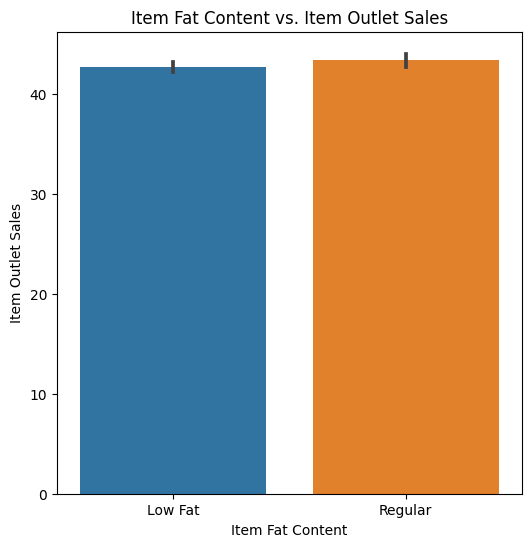

In [375]:
plt.figure(figsize=(6, 6))
sns.barplot(data=train_df, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Item Fat Content vs. Item Outlet Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

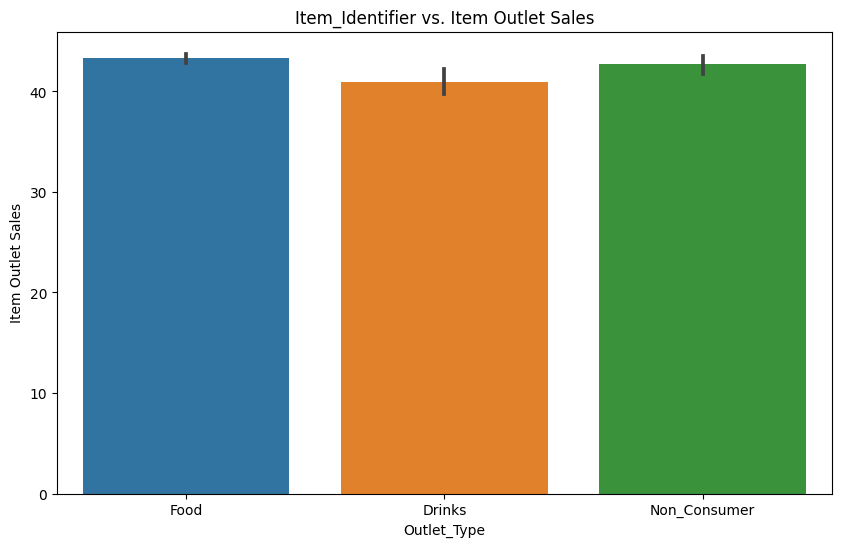

In [376]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Item_Identifier', y='Item_Outlet_Sales')
plt.title('Item_Identifier vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()

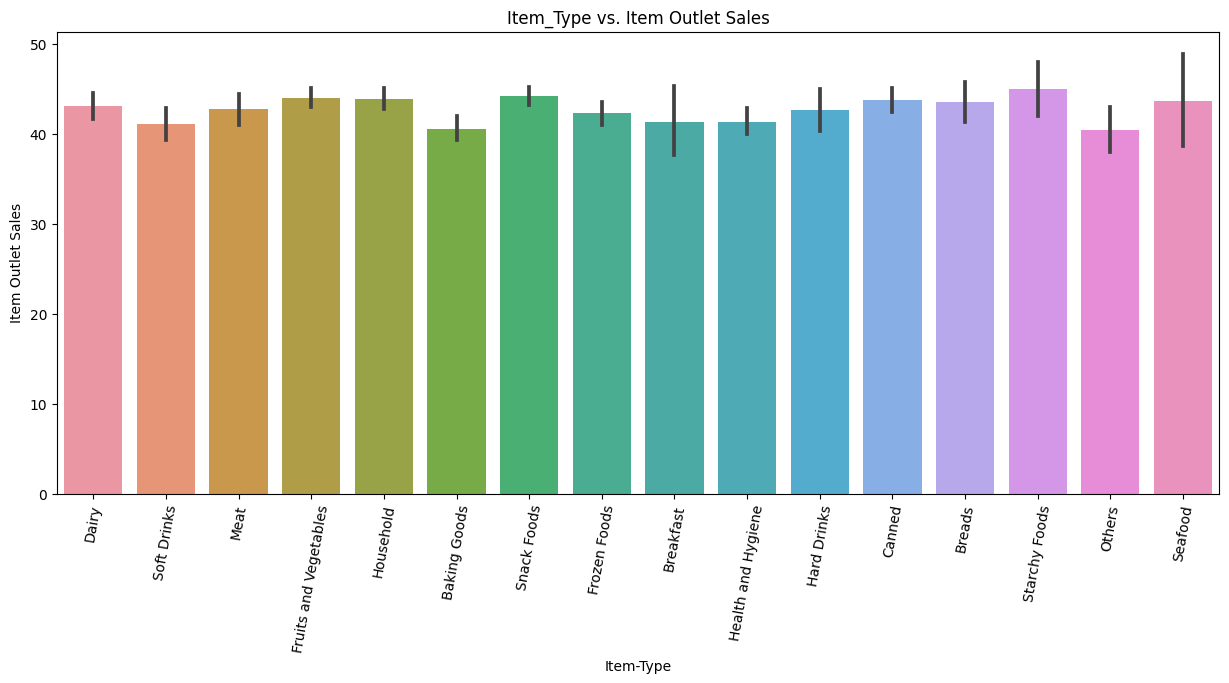

In [377]:
plt.figure(figsize=(15, 6))
sns.barplot(data=train_df, x='Item_Type', y='Item_Outlet_Sales')
plt.title('Item_Type vs. Item Outlet Sales')
plt.xlabel('Item-Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=80)
plt.show()

In [378]:
plt.figure(figsize=(25,10))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train_df,palette='mako')
plt.legend()

TypeError: barplot() got multiple values for argument 'data'

<Figure size 2500x1000 with 0 Axes>

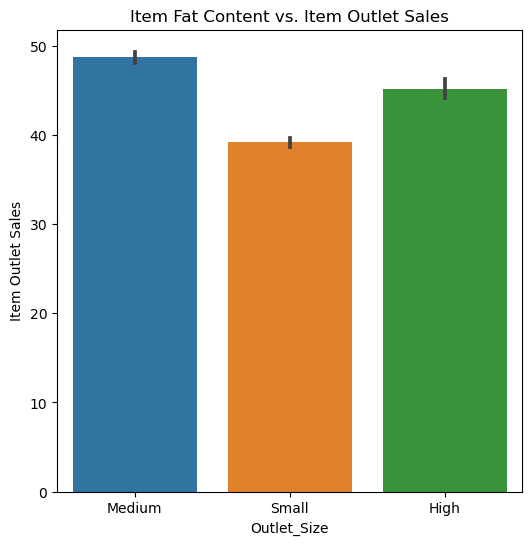

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=train_df, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Item Fat Content vs. Item Outlet Sales')
plt.xlabel('Outlet_Size')
plt.ylabel('Item Outlet Sales')
plt.show()

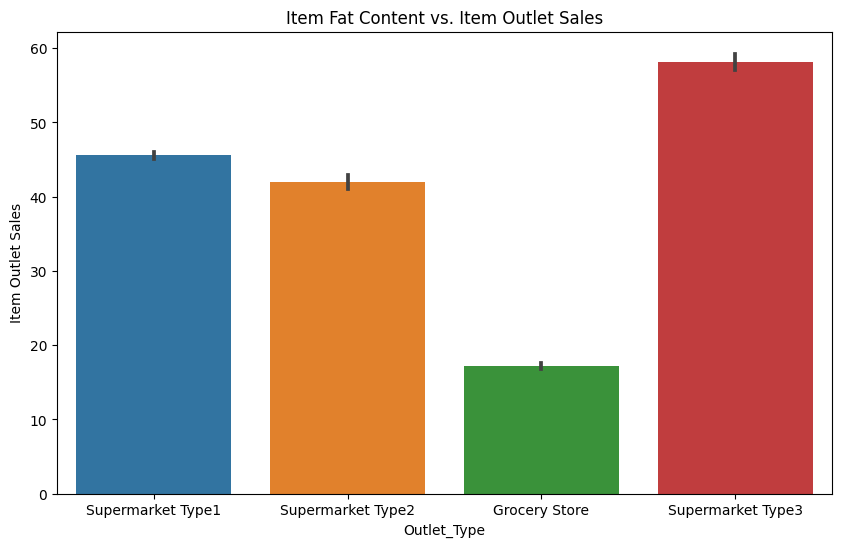

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Item Fat Content vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()

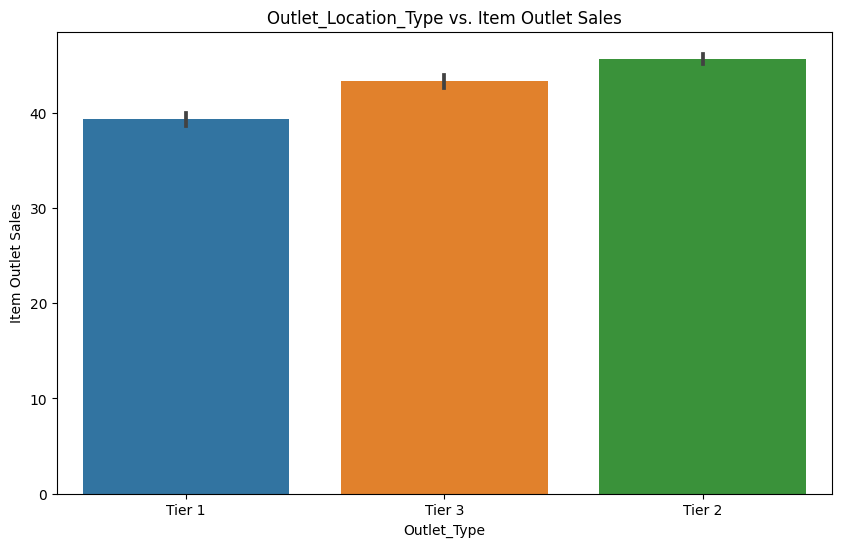

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Outlet_Location_Type vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()

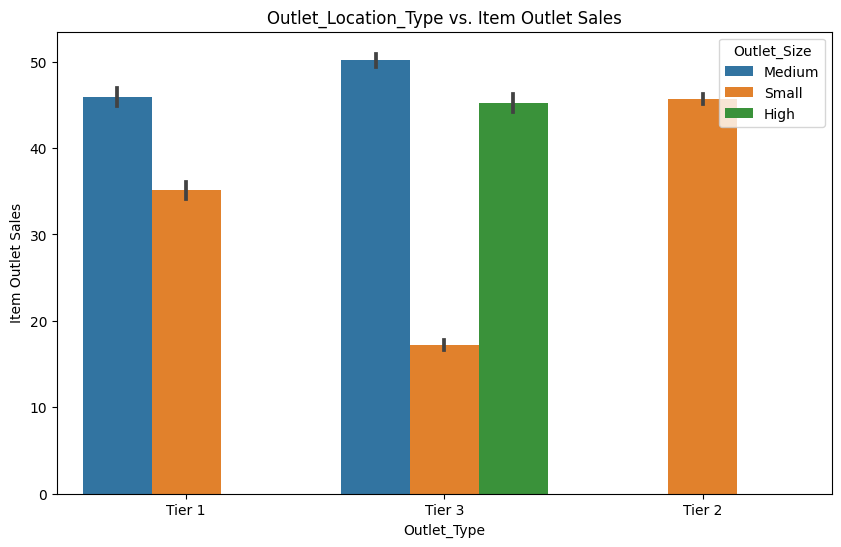

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Size')
plt.title('Outlet_Location_Type vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()

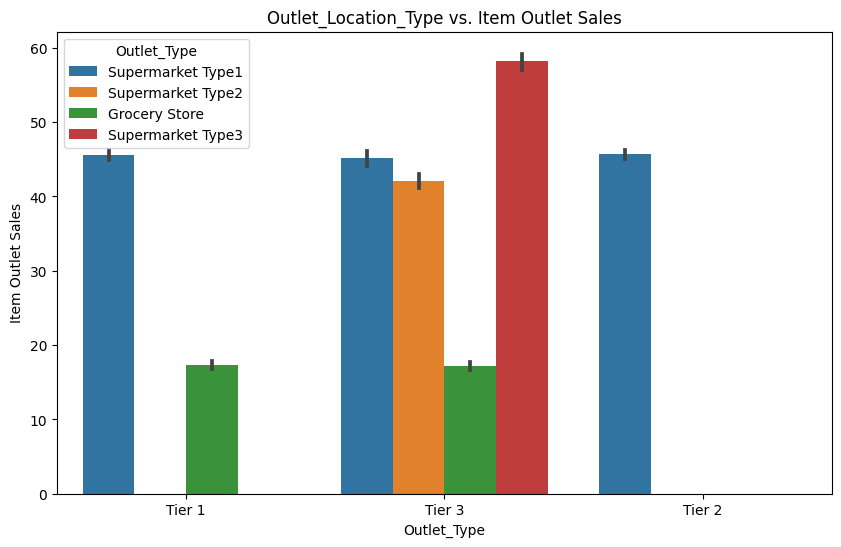

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type')
plt.title('Outlet_Location_Type vs. Item Outlet Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()

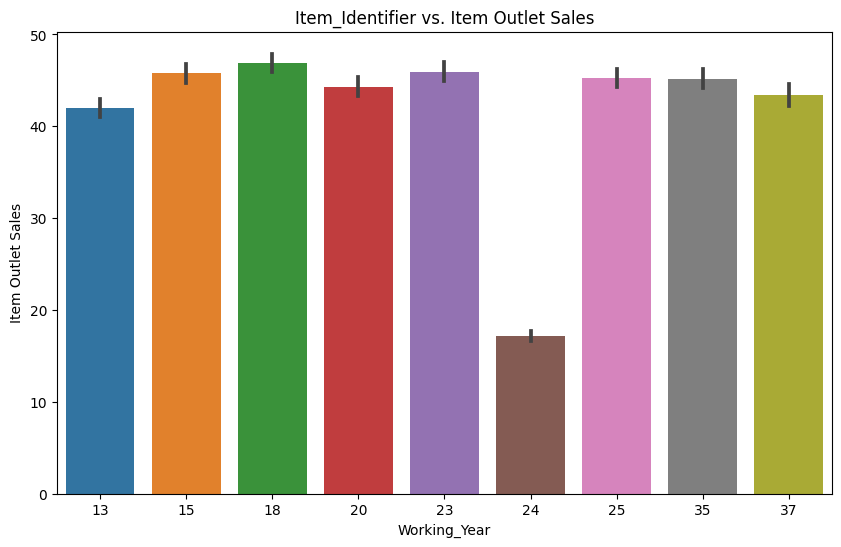

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='Working_Year', y='Item_Outlet_Sales')
plt.title('Item_Identifier vs. Item Outlet Sales')
plt.xlabel('Working_Year')
plt.ylabel('Item Outlet Sales')
plt.show()

In [ ]:
pd.crosstab(train_df.Outlet_Size,train_df.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,1083,3715,0,0


In [ ]:
pd.crosstab(test_df.Outlet_Size,test_df.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,621
Medium,620,0,1242
Small,972,1856,370


## Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Working_Year
0,Food,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775,23
1,Drinks,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607,13


In [ ]:
train_df = train_df.drop(columns = ['Outlet_Identifier','Outlet_Establishment_Year'])
test_df = test_df.drop(columns = ['Outlet_Identifier','Outlet_Establishment_Year'])

In [ ]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Working_Year
0,Food,9.30,Low Fat,0.126678,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,61.115775,23
1,Drinks,5.92,Regular,0.138846,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,21.057607,13


In [ ]:
le = LabelEncoder()

In [ ]:
cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type',]

for i in cols:
    train_df[i] = le.fit_transform(train_df[i])
    
for i in cols:
    test_df[i] = le.fit_transform(test_df[i])

In [ ]:
train_df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Working_Year
1516,1,18.10,0,0.193629,6,95.5094,2,2,0,9.757530,24
5493,0,4.61,0,0.257161,7,173.8396,2,0,1,34.943915,25
5306,1,19.85,0,0.210924,4,89.4856,2,1,1,32.475024,18
225,2,14.50,0,0.130832,11,211.9560,2,0,0,14.596438,37


In [ ]:
train_df['Item_Identifier'].value_counts()

Item_Identifier
1    6125
2    1599
0     799
Name: count, dtype: int64

# Train_test_Split

In [ ]:
X = train_df.drop(columns=['Item_Outlet_Sales'])
y= train_df['Item_Outlet_Sales']

In [ ]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Working_Year
0,1,9.30,0,0.126678,4,249.8092,1,0,1,23
1,0,5.92,1,0.138846,14,48.2692,1,2,2,13


In [ ]:
y.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.33,random_state= 10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5710, 10), (2813, 10), (5710,), (2813,))

## Standard Scalar

In [ ]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
pd.DataFrame(X_train_sc,columns=list(X_train.columns))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Working_Year
0,1.713600,1.062293,-0.735636,1.787694,0.431775,0.570123,0.807643,-1.380099,-0.256227,0.093201
1,-0.199708,-0.886904,1.359368,1.345555,-1.482942,0.533583,0.807643,1.082130,-1.502444,-0.025483
2,-0.199708,-1.681940,-0.735636,-0.125339,-0.286244,0.606662,0.807643,-0.148984,-0.256227,-0.737586
3,-0.199708,-0.119039,1.359368,-0.599723,-0.286244,-0.491234,-0.652200,-1.380099,-0.256227,-0.144167
4,-0.199708,1.865598,-0.735636,-1.060152,-0.286244,-0.260366,-2.112043,1.082130,-0.256227,1.280040
...,...,...,...,...,...,...,...,...,...,...
5705,-0.199708,-0.119039,-0.735636,-0.678175,0.671115,-1.321764,-0.652200,1.082130,2.236206,1.517408
5706,-0.199708,-1.260205,1.359368,-0.448803,-1.722282,0.689843,0.807643,-1.380099,-0.256227,0.093201
5707,-0.199708,-0.000906,-0.735636,-0.759439,1.389134,0.511599,0.807643,-0.148984,-0.256227,-0.737586
5708,-0.199708,0.223547,1.359368,-1.041081,-1.004263,-0.853111,0.807643,1.082130,-1.502444,-0.025483


In [ ]:
pd.DataFrame(X_test_sc,columns=list(X_test.columns))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Working_Year
0,-2.113016,-0.248985,-0.735636,0.699370,1.628474,0.525010,-0.652200,1.082130,2.236206,1.517408
1,-0.199708,-1.171605,1.359368,0.647529,-1.243602,-0.577088,0.807643,-1.380099,-0.256227,0.093201
2,-0.199708,-0.048159,1.359368,0.294321,-0.525583,0.823526,0.807643,-0.148984,-0.256227,-0.500218
3,-0.199708,1.121359,1.359368,-0.576379,1.389134,-0.681785,-0.652200,1.082130,0.989989,-1.331006
4,-0.199708,1.830158,1.359368,-0.343902,-0.286244,0.773066,0.807643,-0.148984,-0.256227,-0.500218
...,...,...,...,...,...,...,...,...,...,...
2808,1.713600,0.069974,-0.735636,1.242425,0.431775,-0.762334,0.807643,-1.380099,-1.502444,1.517408
2809,-0.199708,-0.000906,1.359368,1.828649,-0.525583,-1.532771,0.807643,-1.380099,-1.502444,1.517408
2810,-0.199708,1.026853,1.359368,-1.569904,-1.004263,0.388654,0.807643,-0.148984,-0.256227,-1.093638
2811,-0.199708,1.452132,1.359368,0.700818,-0.525583,-1.486004,0.807643,-0.148984,-0.256227,-0.500218


In [ ]:
import joblib

In [382]:
#pickle.dump(sc,open('Scalar.pkl','wb'))
joblib.dump(sc, 'sc1.sav')

['sc1.sav']

# Model Training

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_train_pred = xgb.predict(X_train)

In [ ]:
y_test_pred = xgb.predict(X_test)

In [ ]:
print("Train Accuracy:")
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)

print("Train mae  ",mae)
print("Train mse  ",mse)
print("Train rmse  ",rmse)
print("Train r2 ",r2)

print("--"*30)
print("Test Accuracy:")
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

print("test mae  ",mae)
print("test mse  ",mse)
print("test rmse  ",rmse)
print("test r2 ",r2)

Train Accuracy:
Train mae   4.803422601616537
Train mse   40.834485304950086
Train rmse   6.390186640854091
Train r2  0.8789045781629139
------------------------------------------------------------
Test Accuracy:
test mae   8.68343787376162
test mse   130.78254669095574
test rmse   11.436019704904139
test r2  0.6115104078216214


In [ ]:
y_test.head(10)

7186    60.409021
2283    42.960419
2206    51.722185
5446    25.995904
6380    61.278969
5571    50.662205
2584    49.012309
3210    73.396102
2976    70.021077
330     17.500514
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
y_test_pred[0:10]

array([68.009254, 37.92839 , 49.647224, 39.269146, 56.225426, 52.329273,
       41.407574, 57.98564 , 51.803535, 40.235416], dtype=float32)

## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# # Create the XGBoostRegressor model
# xgb = XGBRegressor()

# # Define the hyperparameters and their possible values
# param_grid = {
#     'learning_rate': [0.01,0.1,0.0001],
#     'n_estimators': [200,300,400,500],
#     'max_depth': [2,3,4,5]
# }

# # Create the GridSearchCV object with the model and parameter grid
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)

# # Fit the GridSearchCV object on the training data
# grid_search.fit(X_train, y_train)


# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model with the best hyperparameters
# best_model = grid_search.best_estimator_

# # Predict on the test data using the best model
# y_pred = best_model.predict(X_test)

# # Calculate the root mean squared error (RMSE)
# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Mean Absolute Error:", mae)
# print("Root Mean Squared Error:", rmse)
# print("R-squared:", r2)


In [ ]:
xgb = XGBRegressor(learning_rate = 0.01, max_depth = 3, n_estimators = 500)

xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)

y_test_pred = xgb.predict(X_test)


print("Train Accuracy:")
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)

print("Train mae  ",mae)
print("Train mse  ",mse)
print("Train rmse  ",rmse)
print("Train r2 ",r2)

print("--"*30)
print("Test Accuracy:")
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

print("test mae  ",mae)
print("test mse  ",mse)
print("test rmse  ",rmse)
print("test r2 ",r2)

Train Accuracy:
Train mae   7.8001790161709605
Train mse   104.15639370020851
Train rmse   10.205703978668424
Train r2  0.6911222870090296
------------------------------------------------------------
Test Accuracy:
test mae   8.07413262267513
test mse   111.86139584303956
test rmse   10.576454786129403
test r2  0.6677156918020782


In [381]:
# pickle.dump('xgb',open('xgbmodel.pkl', 'wb'))
joblib.dump(xgb,'regressor.sav')

['regressor.sav']

In [ ]:
input_data = pd.DataFrame([['Food', 19.200, 'Regular', 0.2324, 'Fruits and Vegetables', 182.0950, 'Small', 'Tier 3', 'Grocery Store', 24]],
                          columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
                                   'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
                                   'Outlet_Type', 'Working_Year'])


In [ ]:
X_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Working_Year'],
      dtype='object')

In [ ]:
# X= np.array([[ 1,19.200,1,0.2324, 6, 182.0950, 2,2,0, 24 ]])

# # Load the scaler
# scaler_path = "Scalar.pkl"
# scaler = pickle.load(open(scaler_path, "rb"))
# X_std = scaler.transform(X)

# # Load the XGBoost model
# model_path = "xgbmodel.pkl"
# ra = pickle.load(open(model_path, "rb"))

# y_pred = ra.predict(X_std)

In [ ]:
X= np.array([[ 1,19.200,1,0.2324, 6, 182.0950, 2,2,0, 24 ]])
scaler_path= r'sc1.sav'

sc=joblib.load(scaler_path)

X_std= sc.transform(X)

model_path=r'regressor.sav'

model= joblib.load(model_path)

Y_pred=model.predict(X_std)

In [380]:
Y_pred**2

array([41.255318], dtype=float32)

In [ ]:
X_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Working_Year'],
      dtype='object')